In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
#Load the dataset
df = pd.read_excel('/content/Data Analyst Intern Assignment - Excel.xlsx')

In [4]:
#Clean the data by handling missing values
df.dropna(inplace=True)

In [5]:
#Check for duplicate entries
print(f"Number of duplicated entries: {df.duplicated().sum()}")

Number of duplicated entries: 0


In [6]:
#Encoding categorical variables (if needed)
label_encoder = LabelEncoder()

In [7]:
#Encoding 'User Name' and 'Favorite Meal' columns
df['User Name'] = label_encoder.fit_transform(df['User Name'])
df['Favorite Meal'] = label_encoder.fit_transform(df['Favorite Meal'])

In [8]:
#Check the transformed dataset
print(df.head())

  User ID  User Name  Age       Location Registration Date         Phone  \
0    U001          0   28       New York        2023-01-15  123-456-7890   
1    U002          1   35    Los Angeles        2023-02-20  987-654-3210   
2    U003          2   42        Chicago        2023-03-10  555-123-4567   
3    U004          3   27  San Francisco        2023-04-05  444-333-2222   
4    U005          4   30        Seattle        2023-05-22  777-888-9999   

               Email  Favorite Meal  Total Orders  
0    alice@email.com              1            12  
1      bob@email.com              2             8  
2  charlie@email.com              0            15  
3    david@email.com              1            10  
4     emma@email.com              2             9  


In [9]:
session_order = df.groupby('User Name').agg({'Favorite Meal': 'count', 'Total Orders': 'sum'}).reset_index()
print(session_order.head())


   User Name  Favorite Meal  Total Orders
0          0              1            12
1          1              1             8
2          2              1            15
3          3              1            10
4          4              1             9


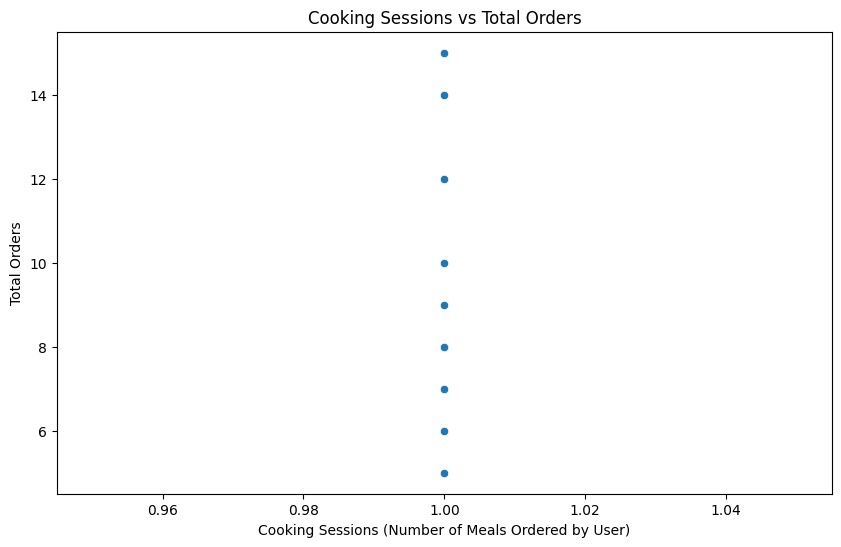

In [10]:
#Plot the relationship between cooking sessions (Favorite Meal) and total orders placed by users
plt.figure(figsize=(10, 6))
sns.scatterplot(data=session_order, x='Favorite Meal', y='Total Orders')
plt.title('Cooking Sessions vs Total Orders')
plt.xlabel('Cooking Sessions (Number of Meals Ordered by User)')
plt.ylabel('Total Orders')
plt.show()

In [11]:
#most popular dishes based on the orders
meal_order = df.groupby('Favorite Meal')['Total Orders'].sum().sort_values(ascending=False)

In [17]:
meal_order.head()

,Total Orders
Favorite Meal,
1,42
0,29
2,23


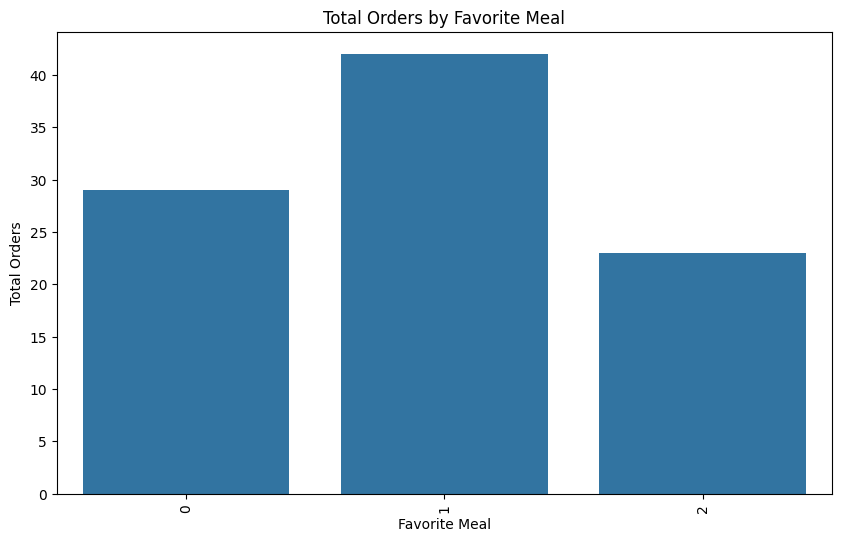

In [12]:
#Plot the most popular meals
plt.figure(figsize=(10, 6))
sns.barplot(x=meal_order.index, y=meal_order.values)
plt.xticks(rotation=90)
plt.title('Total Orders by Favorite Meal')
plt.xlabel('Favorite Meal')
plt.ylabel('Total Orders')
plt.show()

In [18]:
user_order = selected_columns.groupby('User Name')['Favorite Meal'].sum().sort_values(ascending=False)

In [19]:
user_order.head()

,Favorite Meal
User Name,
1,2
4,2
8,2
0,1
3,1


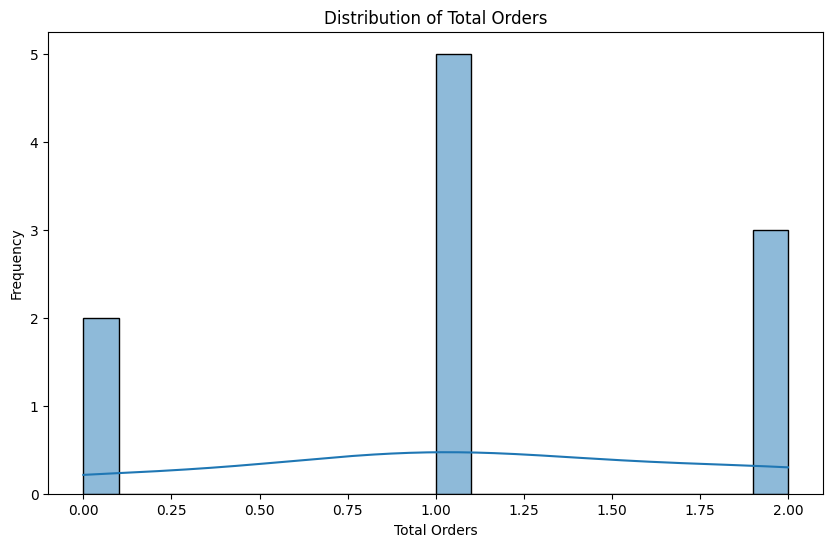

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(user_order.values, bins=20, kde=True)
plt.title('Distribution of Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.show()


In [21]:
#Split the data into training and testing sets (80% train, 20% test)
X = df[['User Name', 'Favorite Meal']]
y = df['Total Orders']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (8, 2)
X_test shape: (2, 2)
